<a href="https://colab.research.google.com/github/wasimkhan33/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project_(Individual_Notebook).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

We will try to analysis this data by giving answer to this following Questions

1.   How Many Booking Were Cancelled?
2.   What is the booking ratio between Resort Hotel and City Hotel?
3.   What is the percentage of booking for each year?
4.   Which is the busiest month for hotels?
5.   From which country most guests come?
6.   How Long People Stay in the hotel?
7.   Which was the most booked accommodation type (Single, Couple, Family)?










In [ ]:
# First Importing necessary packages and importing the dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis/Hotel Bookings.csv')

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.shape

(119390, 32)

In [ ]:
df = data.copy()

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Evaluating for Missing Data and performing Data Cleaning

Source - https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/

In [ ]:
## Find the missing value, show the total null values for each column and sort it in descending order
df.isnull().sum().sort_values(ascending=False)[:10]

company                     112593
agent                        16340
country                        488
children                         4
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_week_number         0
is_canceled                      0
market_segment                   0
dtype: int64

We have 4 features with missing values.

In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with 0.

In [ ]:
df.loc[:,['company','agent','country','children']]

,company,agent,country,children
0,NaN,NaN,PRT,0.0
1,NaN,NaN,PRT,0.0
2,NaN,NaN,GBR,0.0
3,NaN,304.0,GBR,0.0
4,NaN,240.0,GBR,0.0
...,...,...,...,...
119385,NaN,394.0,BEL,0.0
119386,NaN,9.0,FRA,0.0
119387,NaN,9.0,DEU,0.0
119388,NaN,89.0,GBR,0.0


We have 4 Column containing null values.


Filling missing value with Zero

Source - https://datatofish.com/replace-nan-values-with-zeros/

In [ ]:
## If no id of agent or company is null, just replace it with 0

df[['agent','company']] = df[['agent','company']].fillna(0.0)

In [ ]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df['country'].fillna(data.country.mode().to_string(), inplace=True)

## for missing children value, replace it with rounded mean value
df['children'].fillna(round(data.children.mean()), inplace=True)

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
## convert datatype of these columns from float to integer
df[['children', 'company', 'agent']] = df[['children', 'company', 'agent']].astype('int64')

In [ ]:
## Drop Rows where there is no adult, baby and child
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

# 1. **How Many Booking Were Cancelled?**


Finding unique vlaues in column

Source - https://stackoverflow.com/questions/27241253/print-the-unique-values-in-every-column-in-a-pandas-dataframe


In [ ]:
# Creating a function so that any time we can find unique values by using this function
def find_unique(value1):
  column_list = df.columns.values.tolist()
  for column_name in column_list:
    unique_value = value1.unique()
    return unique_value

In [ ]:
find_unique(df['is_canceled'])

array([0, 1])

is_canceled have two unique values: 1 if booking got canceled, else 0.
(No = 0, Yes = 1)

In [ ]:
# function to get the percentage of different values.

def get_count(series, limit=None):  # Setting default argument of limit as None
    
    '''
    INPUT:
        series: Pandas Series 
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

This function takes a series or data frame column and returns the two arrays

x is our unique values

y is the percentage value of each unique value

Now let’s use this function on our is_canceled feature and see the result

In [ ]:
x,y = get_count(df['is_canceled'])
x,y

(array([0, 1]), array([62.92341247, 37.07658753]))

In [ ]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(6,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
        
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax)
        
    plt.show()

**Warnings** **Library**

Source - https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning


In [ ]:
# Use the warnings library. Now, true to it's word, the warnings have been removed.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

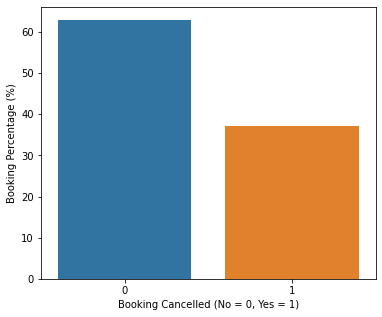

In [ ]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking Percentage (%)')


Conclusion - Bookings got canceled 37% of the time. While booking did not get cancelled almost 63% of the time.

We will select and store both bookings which did not get canceled or get canceled in variable for future use

In [ ]:
# Booking get cenceled
df_booking_cenceled = df[df['is_canceled'] == 1]
# Bokking not get cenceled
df_not_canceled = df[df['is_canceled'] == 0]


In [ ]:
find_unique(df['total_of_special_requests'])

array([0, 1, 3, 2, 4, 5])

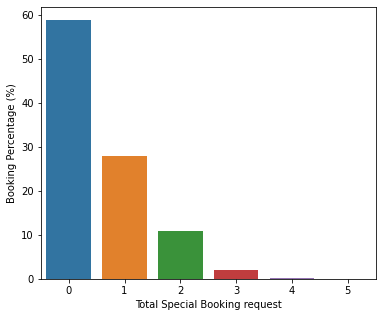

In [ ]:
# Number of special requests made by the customer
x,y = get_count(df['total_of_special_requests'])
plot(x,y, x_label='Total Special Booking request', y_label='Booking Percentage (%)')


As we can see here among all one special booking request were made almost 29% of total bookings

Two special request were made nearly 10% among all and 3 special request is nearly 1-2%.

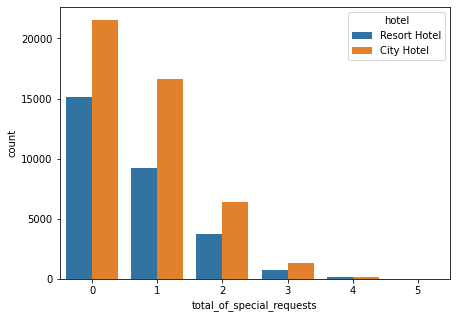

In [ ]:
# Seperating special requests by Hotel types
plt.subplots(figsize=(7,5))
sns.countplot(x='total_of_special_requests', hue='hotel',  data=df_not_canceled);

Point - 

*   As per graph nearly 22 thousands 0 special requests were made in City Hotel and for Resort Hotel this is nearly 15 thousands.
*   1 special requests in City Hotel of count nearly 17 thousands and for Resort Hotel it is 9 thousands
*   2 special requests in City Hotel of count nearly 7 thousands and for Resort it is 4 thousands.
*   3 special requests in City Hotel of count nearly 2 thousands and for Resort it is 1 thousands.
*   4 and 5 special requests in City Hotel of count nearly 0-1 thousands and also for Resort it is 0-1 thousands.

So here we can analyze that most of the Special requests were for City Hotel only.


# 2.   What is the booking ratio between Resort Hotel and City Hotel?


In [ ]:
# Using earlier function to find unique value lets check the column
find_unique(df['hotel'])

array(['Resort Hotel', 'City Hotel'], dtype=object)

We can now reuse the functions that we created earlier by passing the dataframe column to get_count() function and pass its result (x and y array) to plot function.

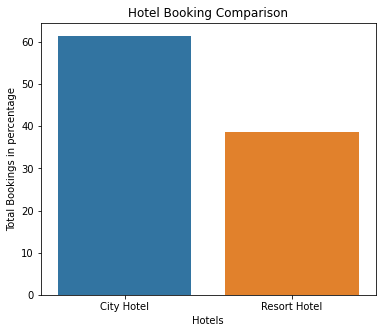

In [ ]:
# we can use earlier function to get the percentage of different values(Here it is Hotels).
x,y = get_count(df_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Bookings in percentage', title='Hotel Booking Comparison')

Conclusion - More than 60% of the population booked the City hotel

# 3. What is the percentage of booking for each year?


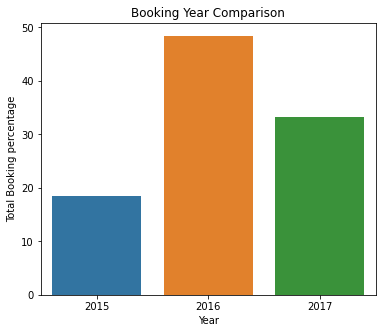

In [ ]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking percentage', title='Booking Year Comparison')

Conclusion - Highest Booking was done in 2016 is nearly 48%. It was good as compared to the previous year 2015. But at the very next year in 2017 booking ratio was down by almost 15%.

Seperating this by hotels

Source - http://alanpryorjr.com/visualizations/seaborn/countplot/countplot/

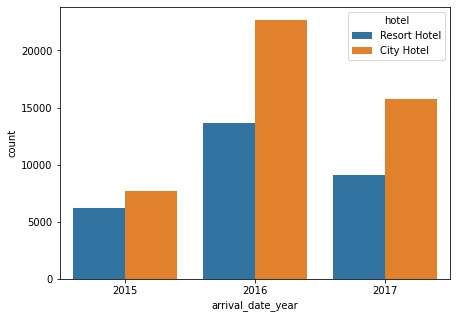

In [ ]:
# Booking persentage seperate by year and Hotel type
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled);

Conclusion - Highest Booking were done for City hotel only in 2016 nearly 24 thousands.


# 4. Which is the busiest month for hotels?


In [ ]:
Booking_count_of_months = df_not_canceled['arrival_date_month'].value_counts()

Sorting months in order

Source - https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name

In [ ]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

sorted_months = Booking_count_of_months.reindex(new_order)

In [ ]:
sorted_months

January      4115
February     5359
March        6620
April        6560
May          7103
June         6395
July         7907
August       8624
September    6385
October      6901
November     4651
December     4391
Name: arrival_date_month, dtype: int64

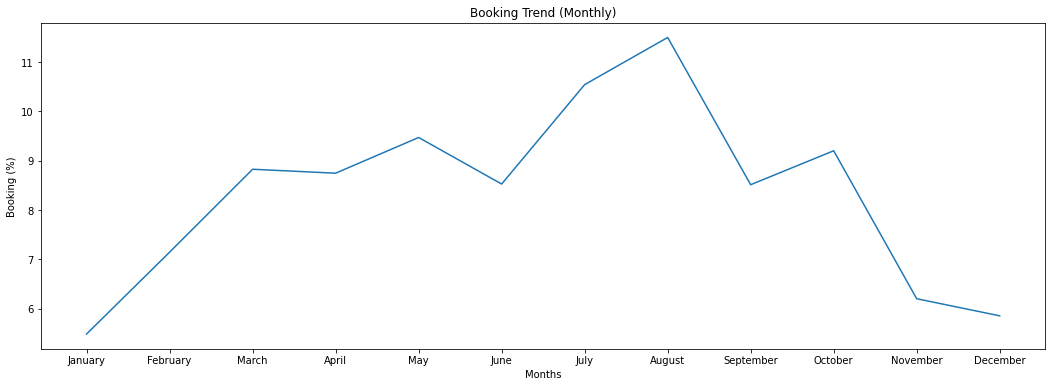

In [ ]:
# Using Line Plot to display the trend
x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


Let’s separate the data for each hotel type and then see the trend.


In [ ]:
## Order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
             'November', 'December']


## Select only City Hotel
sorted_months = df_not_canceled.loc[df.hotel=='City Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x1 = sorted_months.index
y1 = sorted_months/sorted_months.sum()*100



## Select only Resort Hotel
sorted_months = df_not_canceled.loc[df.hotel=='Resort Hotel' ,'arrival_date_month'].value_counts().reindex(new_order)

x2 = sorted_months.index
y2 = sorted_months/sorted_months.sum()*100

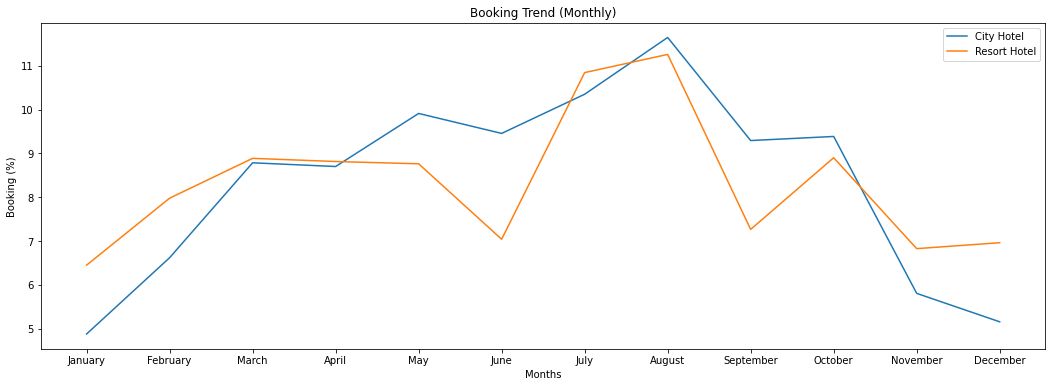

In [ ]:
## Draw the line plot

fig, ax = plt.subplots(figsize=(18,6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')


sns.lineplot(x1, y1.values, label='City Hotel', sort=False)
sns.lineplot(x1, y2.values, label='Resort Hotel', sort=False)

plt.show()

Point - As expected, Maybe due to summer and generally warmer months there are more bookings than colder months. July and August has the most bookings and Janurary has the least.

There is very slight difference between City Hotel and Resort Hotel for the month of July and August.

Conclusion - We can see the trend is kind of similar with a small difference. Resort has more bookings at the start and end of the year, and lower booking in June and September.

# 5. From which country most guests come?

**pycountry** is very useful python package.
We will use this package to get country names from country codes

Source - https://pypi.org/project/pycountry/

In [ ]:
# Package not available in Google Colab installing manually
!pip install pycountry

     |████████████████████████████████| 10.1MB 7.4MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=225b56d5eaa510b5ec5b2290dc9ece24f7c98c022e0e376aae364e332419506e
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry


In [ ]:
import pycountry as pc

In [ ]:
# Reusing get_count function to get the counts of value
x,y = get_count(df_not_canceled['country'], limit=10)
x,y

(array(['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD',
        'USA'], dtype=object),
 array([33.99342073, 15.6670826 , 13.7224716 , 10.34370999,  9.8316291 ,
         4.11933429,  3.93459625,  3.02711112,  2.78079373,  2.57985059]))

Reference - https://www.programcreek.com/python/example/50402/pycountry.countries

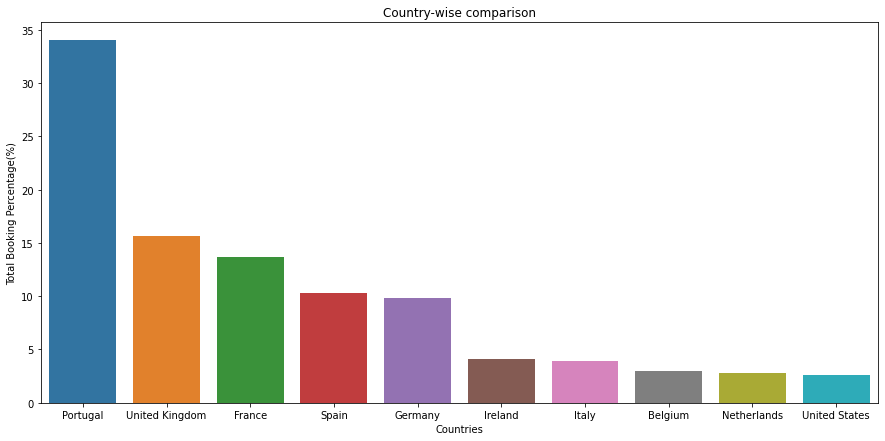

In [ ]:
# Using list comprehension
country_name = [pc.countries.get(alpha_3=name).name for name in x]
# Plot function
plot(country_name,y, x_label='Countries' , y_label= 'Total Booking Percentage(%)', title='Country-wise comparison', figsize=(15,7))

Conclusion - Top countries where 70-80 % of guests are visiting in Portugal, UK, France, Spain and Germany.

Portugal is at the top of all these countries and almost double the booking percentage than the UK.

# 6. How Long People Stay in the hotel?


In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Simply adding week and weekend nights count and storing in variable
total_nights = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']

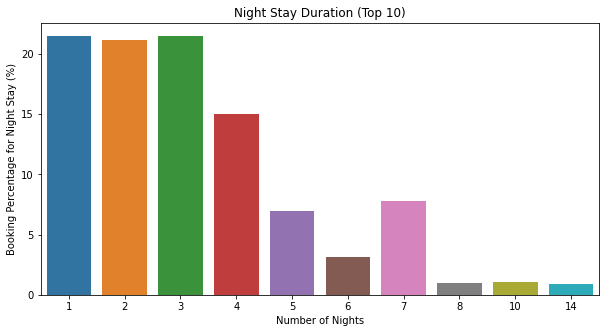

In [ ]:
# Reusing get_count function to get the counts of value
x,y = get_count(total_nights, limit=10)
# Plot function
plot(x,y, x_label='Number of Nights', y_label='Booking Percentage for Night Stay (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))

Conclusion - Most people stay for one, two, or three Nights. More than 60% of guests come under these three options.


Lets seprate and check by hotel type (Resort/City)

In [ ]:
#Removing settingwithcopywarning
pd.options.mode.chained_assignment = None  # default='warn' https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

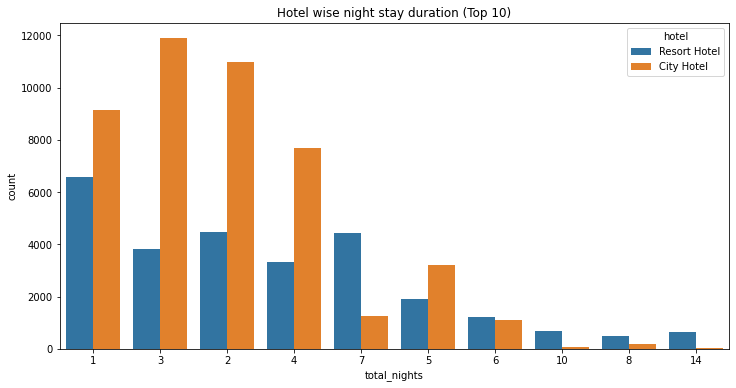

In [ ]:
# Instead of using loc we can direct call column using square brackets
df_not_canceled['total_nights'] = df_not_canceled['stays_in_weekend_nights']+ df_not_canceled['stays_in_week_nights']
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Hotel wise night stay duration (Top 10)')
sns.countplot(x='total_nights', hue='hotel', data=df_not_canceled,
              order = df_not_canceled.total_nights.value_counts().iloc[:10].index, ax=ax);

Conclusion - 

For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.

For City hotel, most popular stay duration is one, two, seven, and three days respectively

# 7. Which was the most booked accommodation type (Single, Couple, Family)?

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
## Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


In [ ]:
## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family']
count = [single.shape[0],couple.shape[0], family.shape[0]]
print(count)


[16022, 49136, 9506]


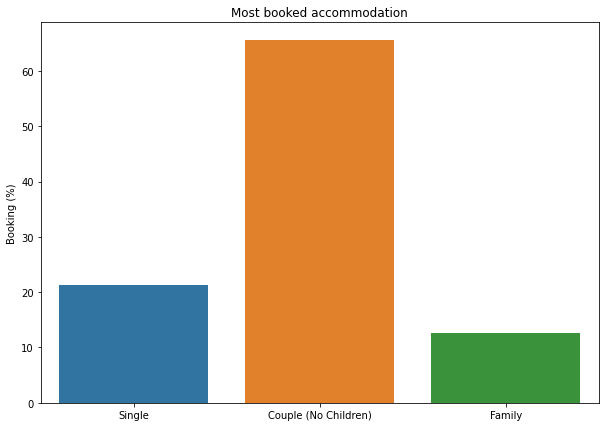

In [ ]:
count_percent = [total/df_not_canceled.shape[0]*100 for total in count]

## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Most booked accommodation', figsize=(10,7))

Conclusion - Couple is the most popular accommodation type. So hotels can make plans accordingly

Final Conclusion:
We used the dataset that contains data about hotel bookings
We cleaned and preprocessed the data and then we performed the exploratory data analysis to extract information from the data to answer the following questions.

1.   How Many Booking Were Cancelled?
2.   What is the booking ratio between Resort Hotel and City Hotel?
3.   What is the percentage of booking for each year?
4.   Which is the busiest month for hotels?
5.   From which country most guests come?
6.   How Long People Stay in the hotel?
7.   Which was the most booked accommodation type (Single, Couple, Family)?

Answers :

*   Bookings got canceled 37% of the time. While booking did not get cancelled almost 63% of the time.
*   There are nearly 59% of 0 Special Request and very less Special requests were made like 1 is 28%, 2 is 10%, 3 is 2% and 4-5 is nearly 0-1%.

*   Most of the special requests were made for City Hotel only.

*   More than 60% of the population booked the City hotel.
*   Highest Booking was done in 2016 is nearly 48%. It was good as compared to the previous year 2015. But at the very next year in 2017 booking ratio was down is at almost 15%.


*   Highest Booking were done for City hotel only in 2016 nearly 24 thousands.

*   Most bookings were made from July to August maybe due to summer generally warmer months have more booking than colder month And the least bookings were made at the start and end of the year.
*   Portugal, the UK, France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

*   Most people stay for one, two, or three.
-> For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.
-> For City hotel, most popular stay duration is one, two, seven(week), and three respectively.
*   Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly.







